**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

**Data Collection and Preprocessing**

In [ ]:
#Loading the dataset to pandas DataFrame
toddlers_df = pd.read_csv("ASD Dataset.csv")
type(toddlers_df)

pandas.core.frame.DataFrame

In [ ]:
#Printing the first 5 rows of the dataframe
toddlers_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
toddlers_df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'class'],
      dtype='object')

In [ ]:
toddlers_df['Who completed the test'].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
toddlers_df['Ethnicity'].unique()

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

In [ ]:
toddlers_df = toddlers_df.replace('Health care professional', 'Health Care Professional')
toddlers_df = toddlers_df.replace('middle eastern', 'Middle Eastern')
toddlers_df = toddlers_df.replace('asian', 'Asian')
toddlers_df = toddlers_df.replace('black', 'Black')
toddlers_df = toddlers_df.replace('south asian', 'South Asian')
toddlers_df = toddlers_df.replace('mixed', 'Mixed')

In [ ]:
toddlers_df.iloc[22]

Case_No                                         23
A1                                               1
A2                                               0
A3                                               1
A4                                               1
A5                                               0
A6                                               1
A7                                               0
A8                                               1
A9                                               1
A10                                              1
Age_Mons                                        36
Qchat-10-Score                                   7
Sex                                              m
Ethnicity                            Native Indian
Jaundice                                       yes
Family_mem_with_ASD                            yes
Who completed the test    Health Care Professional
class                                          Yes
Name: 22, dtype: object

In [ ]:
toddlers_df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
class                     0
dtype: int64

In [ ]:
#convert categorical columns into numerical values
toddlers_df = toddlers_df.replace("yes", 1)
toddlers_df = toddlers_df.replace("no", 0)
toddlers_df = toddlers_df.replace("Yes", 1)
toddlers_df = toddlers_df.replace("No", 0)
toddlers_df = toddlers_df.replace("m", 1)
toddlers_df = toddlers_df.replace("f", 0)

In [ ]:
toddlers_df = toddlers_df.rename(columns={'class':'ASD traits'})

In [ ]:
toddlers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   int64 
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
toddlers_df.shape

(1054, 19)

In [ ]:
toddlers_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,Middle Eastern,1,0,family member,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,White European,1,0,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,Middle Eastern,1,0,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,Hispanic,0,0,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,White European,0,1,family member,1


In [ ]:
toddlers_df.drop(['Case_No','Qchat-10-Score'], axis=1, inplace=True)

In [ ]:
toddlers_df = toddlers_df.replace("Middle Eastern",0)
toddlers_df = toddlers_df.replace("White European",1)
toddlers_df = toddlers_df.replace('Hispanic',2)
toddlers_df = toddlers_df.replace('Others',3)
toddlers_df = toddlers_df.replace('Asian',4)
toddlers_df = toddlers_df.replace('South Asian',5)
toddlers_df = toddlers_df.replace('Native Indian',6)
toddlers_df = toddlers_df.replace('Black',7)
toddlers_df = toddlers_df.replace('Latino',8)
toddlers_df = toddlers_df.replace('Mixed',9)
toddlers_df = toddlers_df.replace('Pacifica',10)

In [ ]:
toddlers_df = toddlers_df.replace('family member',0)
toddlers_df = toddlers_df.replace('Health Care Professional',1)
toddlers_df = toddlers_df.replace('Self',2)

In [ ]:
toddlers_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD traits
0,0,0,0,0,0,0,1,1,0,1,28,0,0,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,2,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,1,0,1,0,1


In [ ]:
toddlers_df.shape

(1054, 17)

In [ ]:
toddlers_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD traits'],
      dtype='object')

In [ ]:
col=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons','Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD','Who completed the test', 'ASD traits']

In [ ]:
for i in col:
    print(i)
    print(toddlers_df[i].value_counts())
    print(" ")

A1
1    594
0    460
Name: A1, dtype: int64
 
A2
0    581
1    473
Name: A2, dtype: int64
 
A3
0    631
1    423
Name: A3, dtype: int64
 
A4
1    540
0    514
Name: A4, dtype: int64
 
A5
1    553
0    501
Name: A5, dtype: int64
 
A6
1    608
0    446
Name: A6, dtype: int64
 
A7
1    685
0    369
Name: A7, dtype: int64
 
A8
0    570
1    484
Name: A8, dtype: int64
 
A9
0    538
1    516
Name: A9, dtype: int64
 
A10
1    618
0    436
Name: A10, dtype: int64
 
Age_Mons
36    320
24     70
30     67
12     67
28     42
26     36
33     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     19
13     18
18     16
21     13
16     13
17     12
Name: Age_Mons, dtype: int64
 
Sex
1    735
0    319
Name: Sex, dtype: int64
 
Ethnicity
1     334
4     299
0     188
5      60
7      53
2      40
3      35
8      26
9       8
10      8
6       3
Name: Ethnicity, dtype: int64
 
Jaundice
0    766
1    288
Name: Jaundice, dtype

<Axes: >

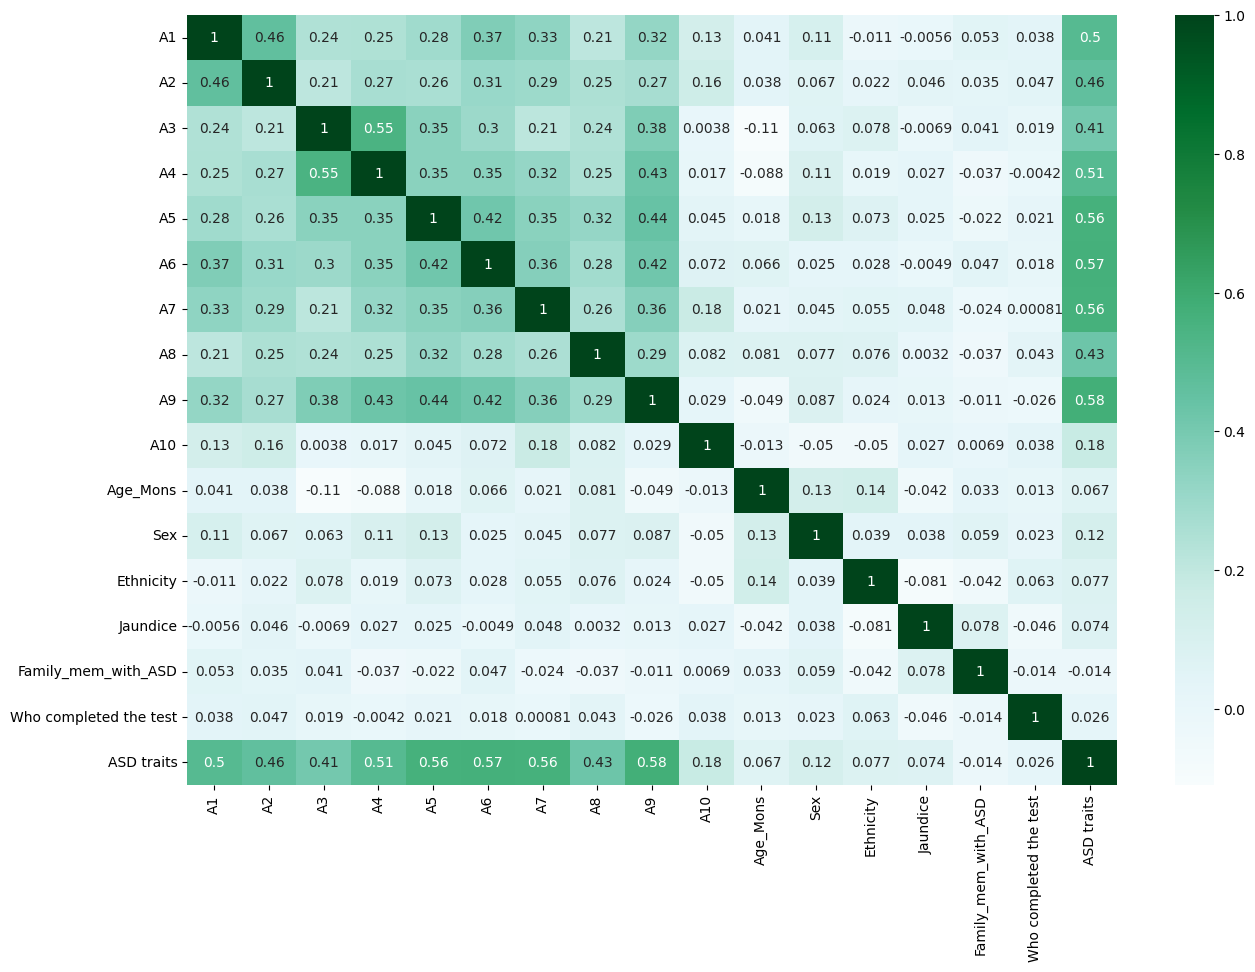

In [ ]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
corr_toddlers = toddlers_df.corr()

plt.figure(figsize = (15, 10))
# plt.title("Toddler Dataset Features Correlations Heatmap", fontsize = 14)
sns.heatmap(corr_toddlers, annot = True, cmap = "BuGn")

In [ ]:
y = toddlers_df['ASD traits']
x = toddlers_df.drop(['ASD traits'], axis=1)


**Data Standardization**

In [ ]:
scaler=StandardScaler()
scaler.fit(x.values)
StandardScaler()
standardizedata=scaler.transform(x.values)
print(standardizedata)

[[-1.13635573 -0.90228244 -0.8187579  ...  1.63086548 -0.43852901
  -0.16936047]
 [ 0.88000612  1.10830041 -0.8187579  ...  1.63086548 -0.43852901
  -0.16936047]
 [ 0.88000612 -0.90228244 -0.8187579  ...  1.63086548 -0.43852901
  -0.16936047]
 ...
 [ 0.88000612 -0.90228244  1.22136226 ...  1.63086548 -0.43852901
  -0.16936047]
 [ 0.88000612 -0.90228244 -0.8187579  ... -0.61317136  2.28035085
  -0.16936047]
 [ 0.88000612  1.10830041 -0.8187579  ...  1.63086548  2.28035085
  -0.16936047]]


In [ ]:
# drop target feature 'ASD traits'
y = toddlers_df['ASD traits']
X = toddlers_df.drop(['ASD traits'], axis=1)

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1054, 16) (843, 16) (211, 16)


In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

**Training the model**

**Support Vector Machine Model**

In [ ]:
sv=svm.SVC()
sv.fit( X_train.values,y_train)
xtrain_prediction=sv.predict(X_train.values)
train_data_accuracy=accuracy_score(xtrain_prediction,y_train)

In [ ]:
#SVM Model
x_test_prediction=sv.predict(X_test.values)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy for Test Data: ',test_data_accuracy)

Accuracy for Test Data:  0.8720379146919431


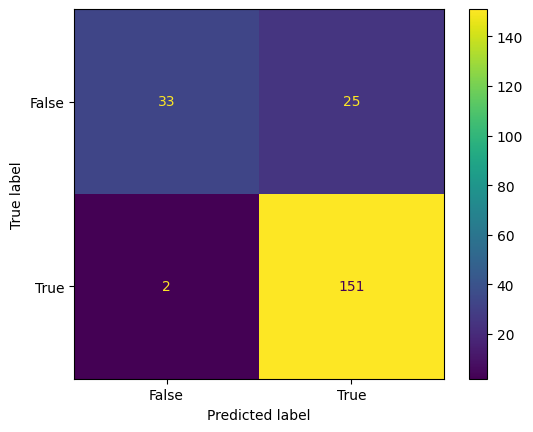

In [ ]:

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,x_test_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', train_data_accuracy, test_data_accuracy)

**Random Forest Classifier**

In [ ]:
rf = rf = RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.1,n_estimators=50,random_state=11)
rf = rf.fit(X_train.values,y_train)
xtrain_prediction=rf.predict(X_train.values)
train_data_accu=accuracy_score(xtrain_prediction,y_train)

In [ ]:
#Random Forest Model
x_test_prediction=rf.predict(X_test.values)
test_data_accu=accuracy_score(x_test_prediction,y_test)
print('Accuracy for Test Data: ',test_data_accu)

Accuracy for Test Data:  0.9383886255924171


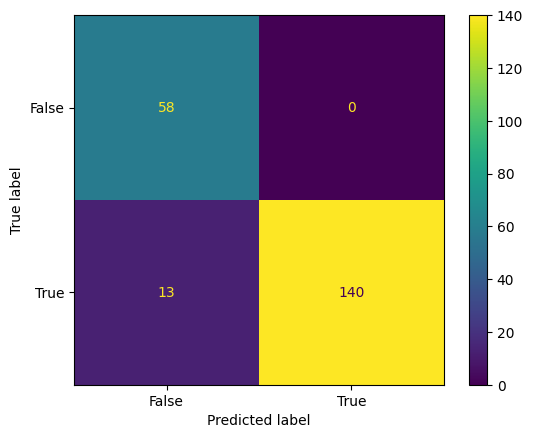

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,x_test_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forset', train_data_accu, test_data_accu)

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,SVM,0.865,0.872
1,Random Forset,0.948,0.938


<Figure size 200x100 with 0 Axes>

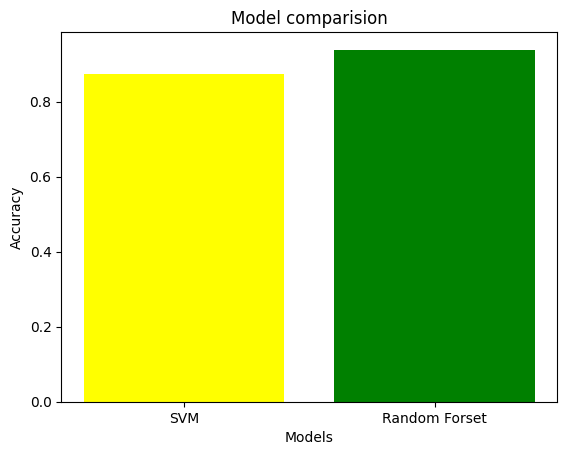

<Figure size 200x100 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
r=results['ML Model']
s=results['Test Accuracy']
colo=["yellow","green"]
plt.bar(r,s,color=colo)
plt.xlabel("Models")
plt.title("Model comparision")
plt.ylabel("Accuracy")
plt.figure(figsize=(2,1))

Text(0, 0.5, 'Accuracy')

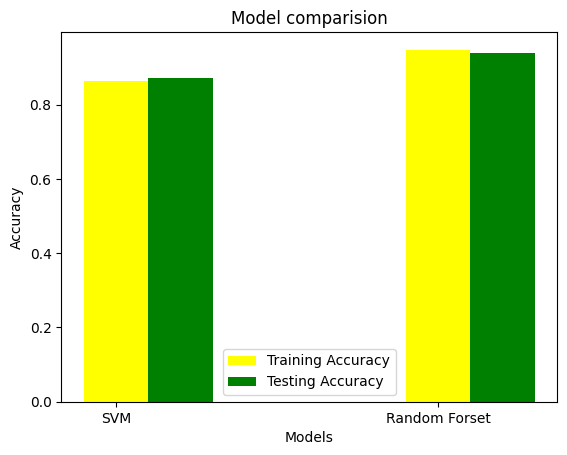

In [ ]:
fb=(results["Train Accuracy"])
yt=(results["Test Accuracy"])
xp=(results["ML Model"])
bandwidth=0.2
xpls=np.arange(len(fb))
plt.bar(xp,fb,color="yellow",width=bandwidth,label="Training Accuracy")
plt.bar(xpls+0.2,yt,color="green",width=bandwidth,label="Testing Accuracy")
plt.legend()
plt.xlabel("Models")
plt.title("Model comparision")
plt.ylabel("Accuracy")

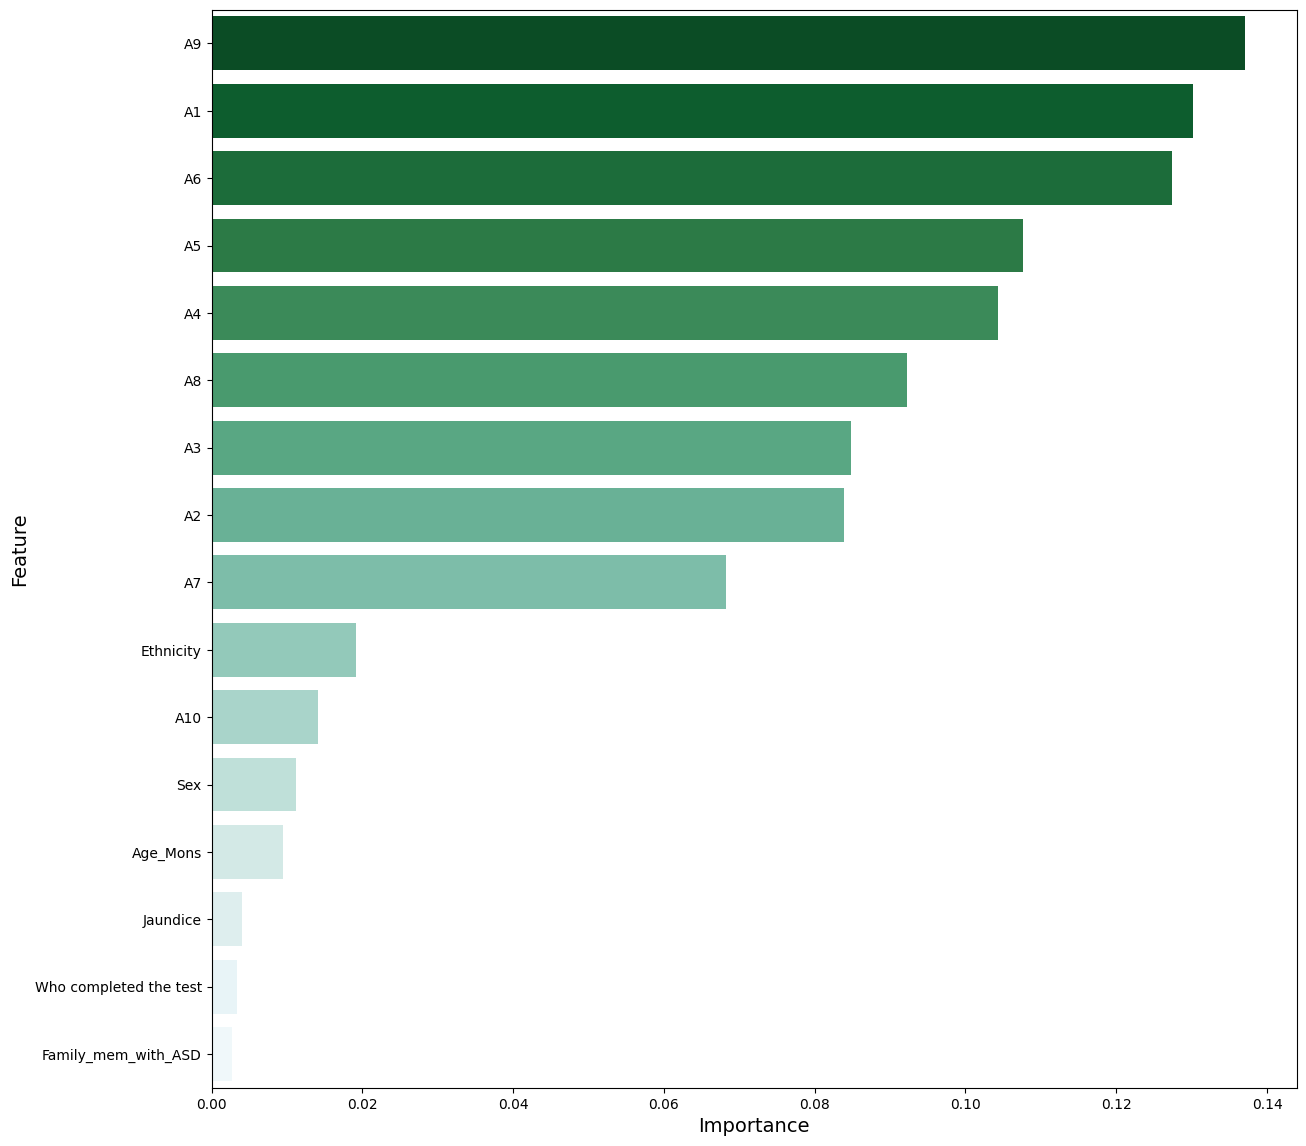

In [ ]:
feat_importance = pd.DataFrame({'Feature':X_train.columns, 'Importance':rf.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
feat_importance = feat_importance.set_index('Feature')
plt.figure(figsize=(14,14))
sns.barplot(x='Importance', y=feat_importance.index, data=feat_importance, palette='BuGn_r')
# plt.title('Feature vs Importance')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

**Making a Predictive Model**

In [ ]:
input_data=(1,1,1,1,0,1,0,1,1,1,36,1,6,1,1,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rf.predict(input_data_reshaped)
print(prediction)
if prediction==0:
    print('Patient is non ASD')
else:
    print('Patient is ASD')

[1]
Patient is ASD


In [ ]:

'''
0,0,0,0,0,0,1,1,0,1,28,0,0,1,0,0   0
1,1,0,0,0,1,1,0,0,0,36,1,1,1,0,0	 1
1,1,0,1,1,1,1,1,1,1,20,0,1,0,1,0	 1
1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,0	 1
1,0,1,1,0,1,0,1,1,1,36,1,6,1,1,1	 1
'''

'\n0,0,0,0,0,0,1,1,0,1,28,0,0,1,0,0   0\n1,1,0,0,0,1,1,0,0,0,36,1,1,1,0,0\t 1\n1,1,0,1,1,1,1,1,1,1,20,0,1,0,1,0\t 1\n1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,0\t 1\n1,0,1,1,0,1,0,1,1,1,36,1,6,1,1,1\t 1\n'

In [ ]:
import pickle

In [ ]:
filename="trained_model.sav"
pickle.dump(rf,open(filename,'wb'))

In [ ]:
loader_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data=(1,1,1,1,0,1,0,1,1,1,36,1,6,1,1,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
#print(std_data)
prediction=loader_model.predict(std_data)
print(prediction)
if prediction==0:
    print('Patient is non ASD')
else:
    print('Patient is ASD')

[1]
Patient is ASD
